In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [11]:
y_train[0]

5

In [16]:
X_test.shape

(10000, 28, 28)

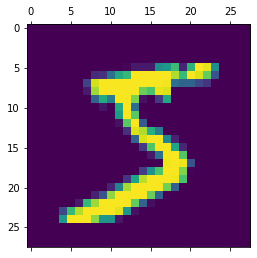

In [10]:
plt.matshow(X_train[0])

In [17]:
#scaling

X_train = X_train / 255
X_test = X_test / 255

In [18]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [21]:
X_train.shape
X_test.shape

(10000, 28, 28, 1)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation="sigmoid"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1479 - accuracy: 0.9555
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0483 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0326 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0186 - accuracy: 0.9938


In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9905: 0s - loss: 0.0391 - ac


[0.0344543382525444, 0.9904999732971191]

In [16]:
y_predicted = model.predict(X_test)

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

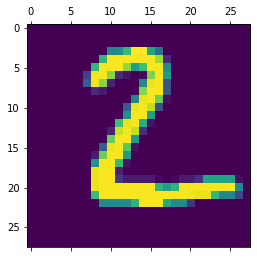

In [21]:
plt.matshow(X_test[1])

In [22]:
y_predicted_labels[1]

2